# Importing libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing dataset

In [7]:
# Reading the csv file from dataset
df = pd.read_csv('avacado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)

In [9]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory Data Analysis

In [10]:
df.shape

(18249, 13)

In [11]:
# Checking the types of the dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# Feature engineering

In [12]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])

In [14]:
# Checking the type of data again
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [16]:
df["Month"] = df["Date"].dt.month

In [17]:
df["Day"] = df["Date"].dt.day

In [18]:
df.drop("Date",axis=1,inplace=True)

In [20]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [22]:
# Checking number of unique values in each column
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [23]:
# Checking null values in the dataset
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

<AxesSubplot:>

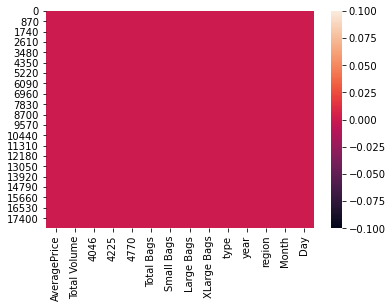

In [24]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

In [25]:
# Checking how many columns are there in the dataset
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [26]:
# Checking the uniqueness of target variable
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [27]:
# List of values in the target variable
df["region"].value_counts()

Seattle                338
Chicago                338
LasVegas               338
Albany                 338
CincinnatiDayton       338
PhoenixTucson          338
SouthCarolina          338
DallasFtWorth          338
Boston                 338
Nashville              338
SanFrancisco           338
GreatLakes             338
Detroit                338
NewOrleansMobile       338
SouthCentral           338
HarrisburgScranton     338
Philadelphia           338
RaleighGreensboro      338
MiamiFtLauderdale      338
Indianapolis           338
HartfordSpringfield    338
Atlanta                338
NewYork                338
NorthernNewEngland     338
Columbus               338
BaltimoreWashington    338
Southeast              338
Louisville             338
Jacksonville           338
California             338
Spokane                338
Boise                  338
Orlando                338
Syracuse               338
Houston                338
Roanoke                338
Midsouth               338
S

In [31]:
# Checking wheather the dataset contains any space
df.loc[df['region']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day


# Description of Dataset

In [32]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.372842,15.466984
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.525034,8.984552
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,10.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


In [34]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


In [35]:
# checking for numirical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


# Data Visualization

conventional    9126
organic         9123
Name: type, dtype: int64


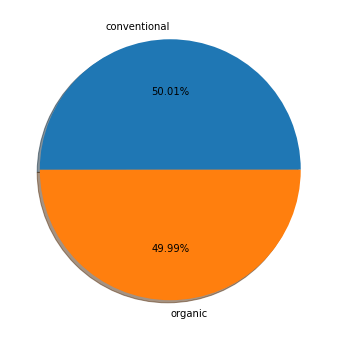

In [38]:
#Visualize the count of type of the avocado
print(df["type"].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

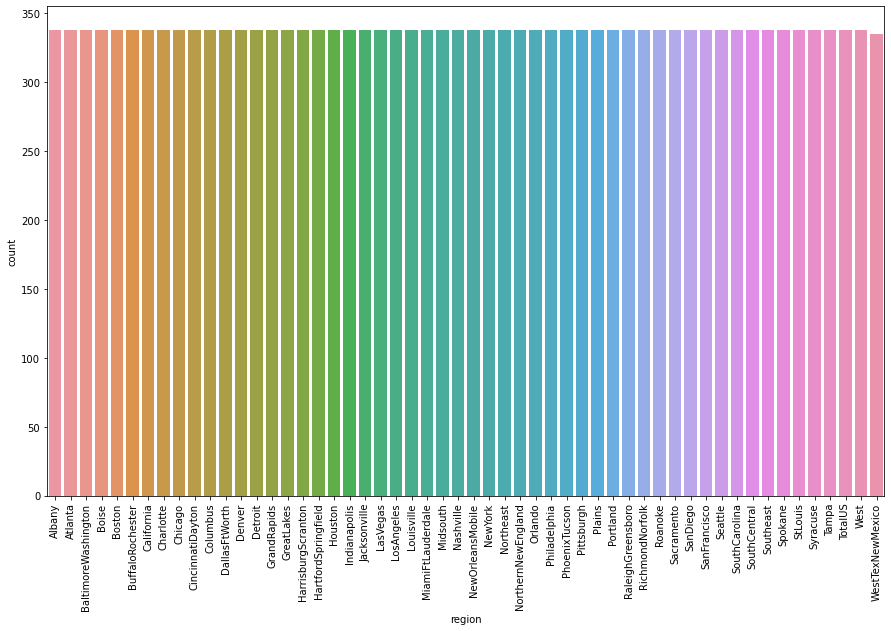

In [41]:
#Visualize the count of year
plt.figure(figsize=(15,9))
sns.countplot(df["region"])
plt.xticks(rotation=90)
plt.show()

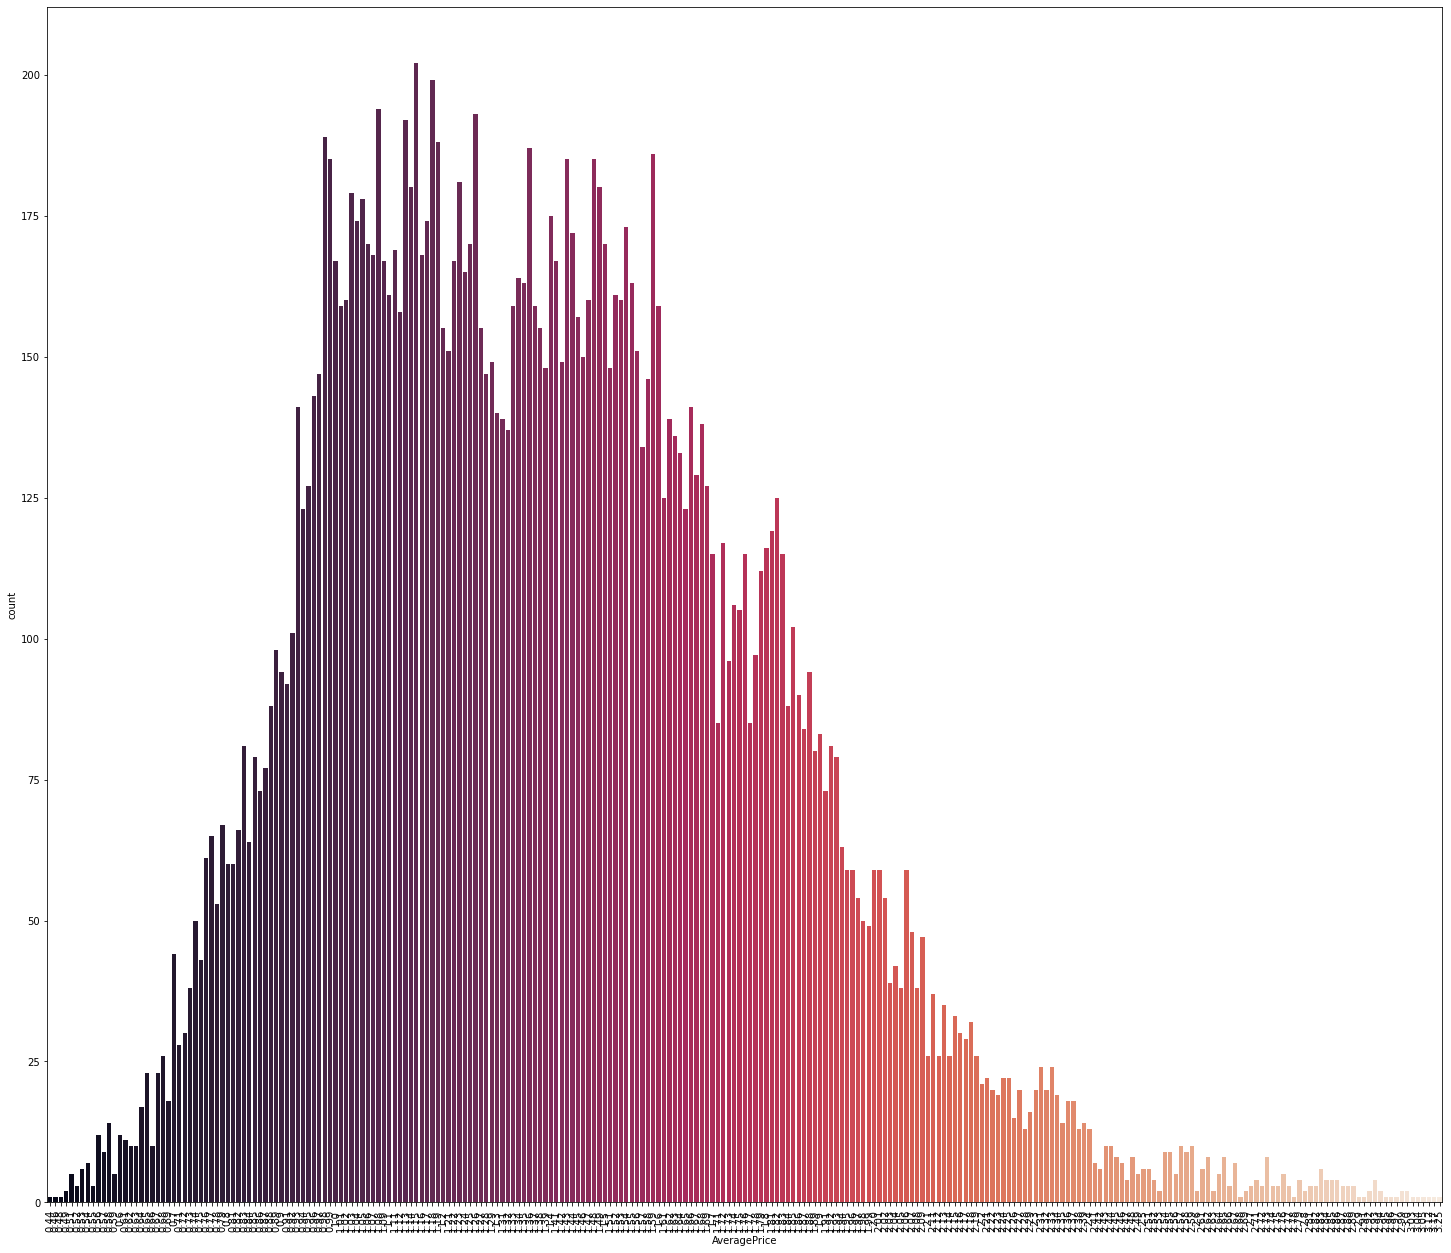

In [44]:
plt.figure(figsize=(25,22))
sns.countplot(df["AveragePrice"],palette="rocket");
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis

Text(0, 0.5, 'region')

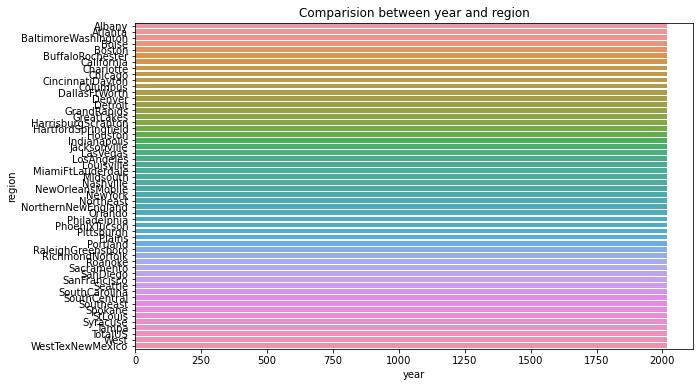

In [45]:
# Checking which year has maximum AveragePrice
plt.figure(figsize=[10,6])
plt.title('Comparision between year and region')
sns.barplot(df['year'],df['region'], data=df);
plt.xlabel("year")
plt.ylabel("region")

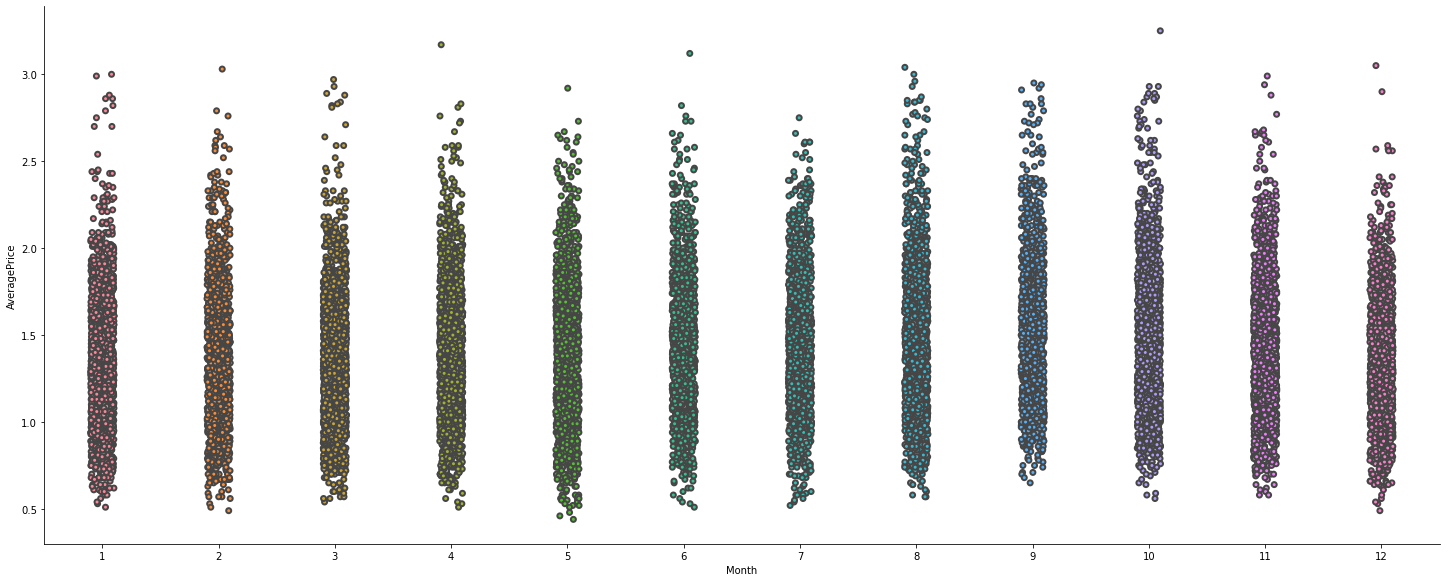

In [46]:
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=2.5)

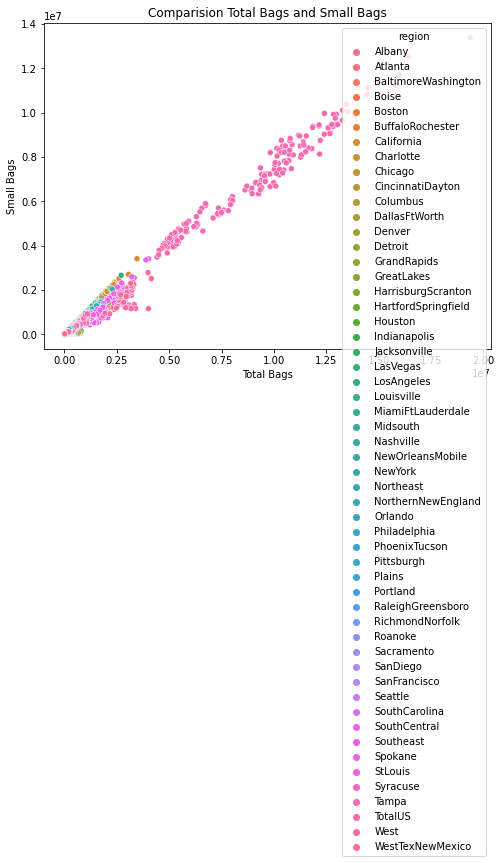

In [52]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Total Bags and Small Bags')
sns.scatterplot(df['Total Bags'],df['Small Bags'],hue=df["region"]);

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

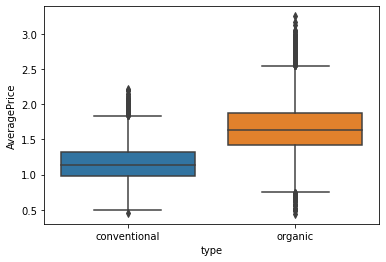

In [55]:
sns.boxplot(x='type',y='AveragePrice',data=df)

<AxesSubplot:xlabel='Month', ylabel='region'>

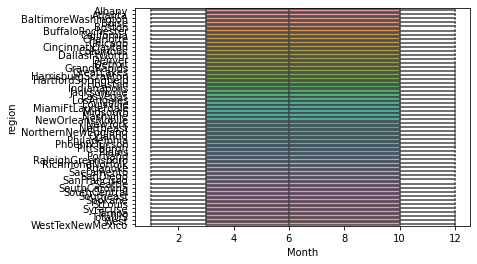

In [56]:
sns.boxplot(x='Month',y='region',data=df)

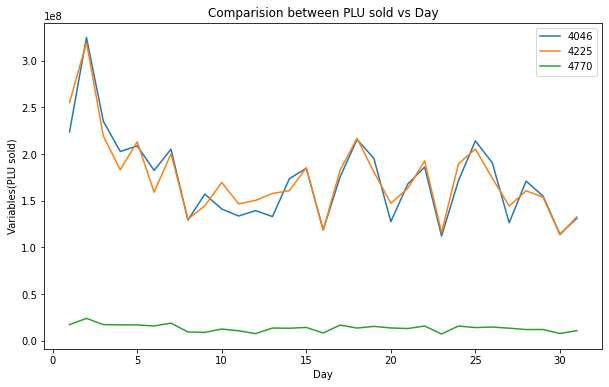

In [61]:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()
variables.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

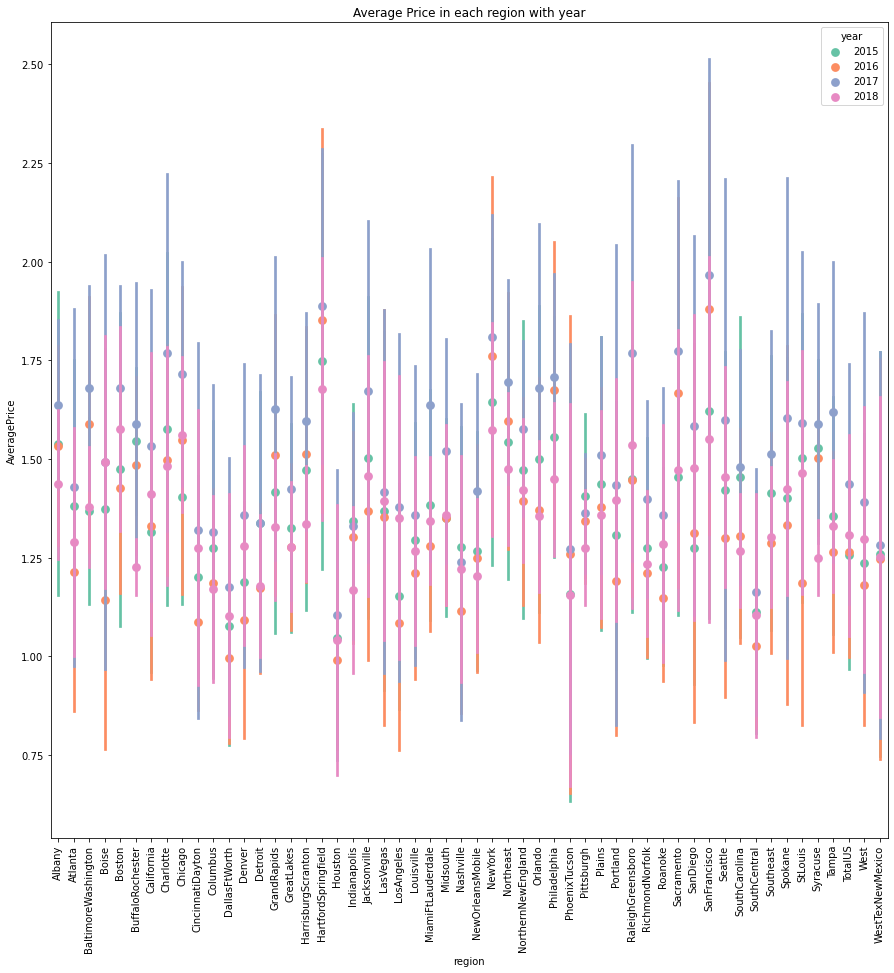

In [66]:
plt.figure(figsize=(15,15))
plt.title("Average Price in each region with year")
sns.pointplot(x='region',y='AveragePrice',data=df, hue='year',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

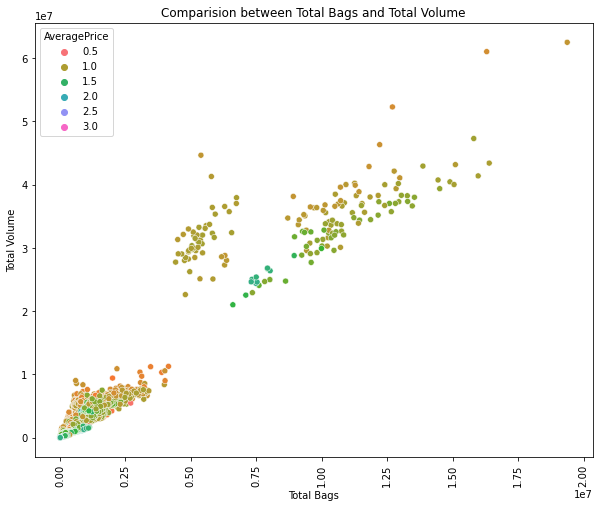

In [67]:
plt.figure(figsize=(10,8))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="AveragePrice",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

# Multivariate Analysis

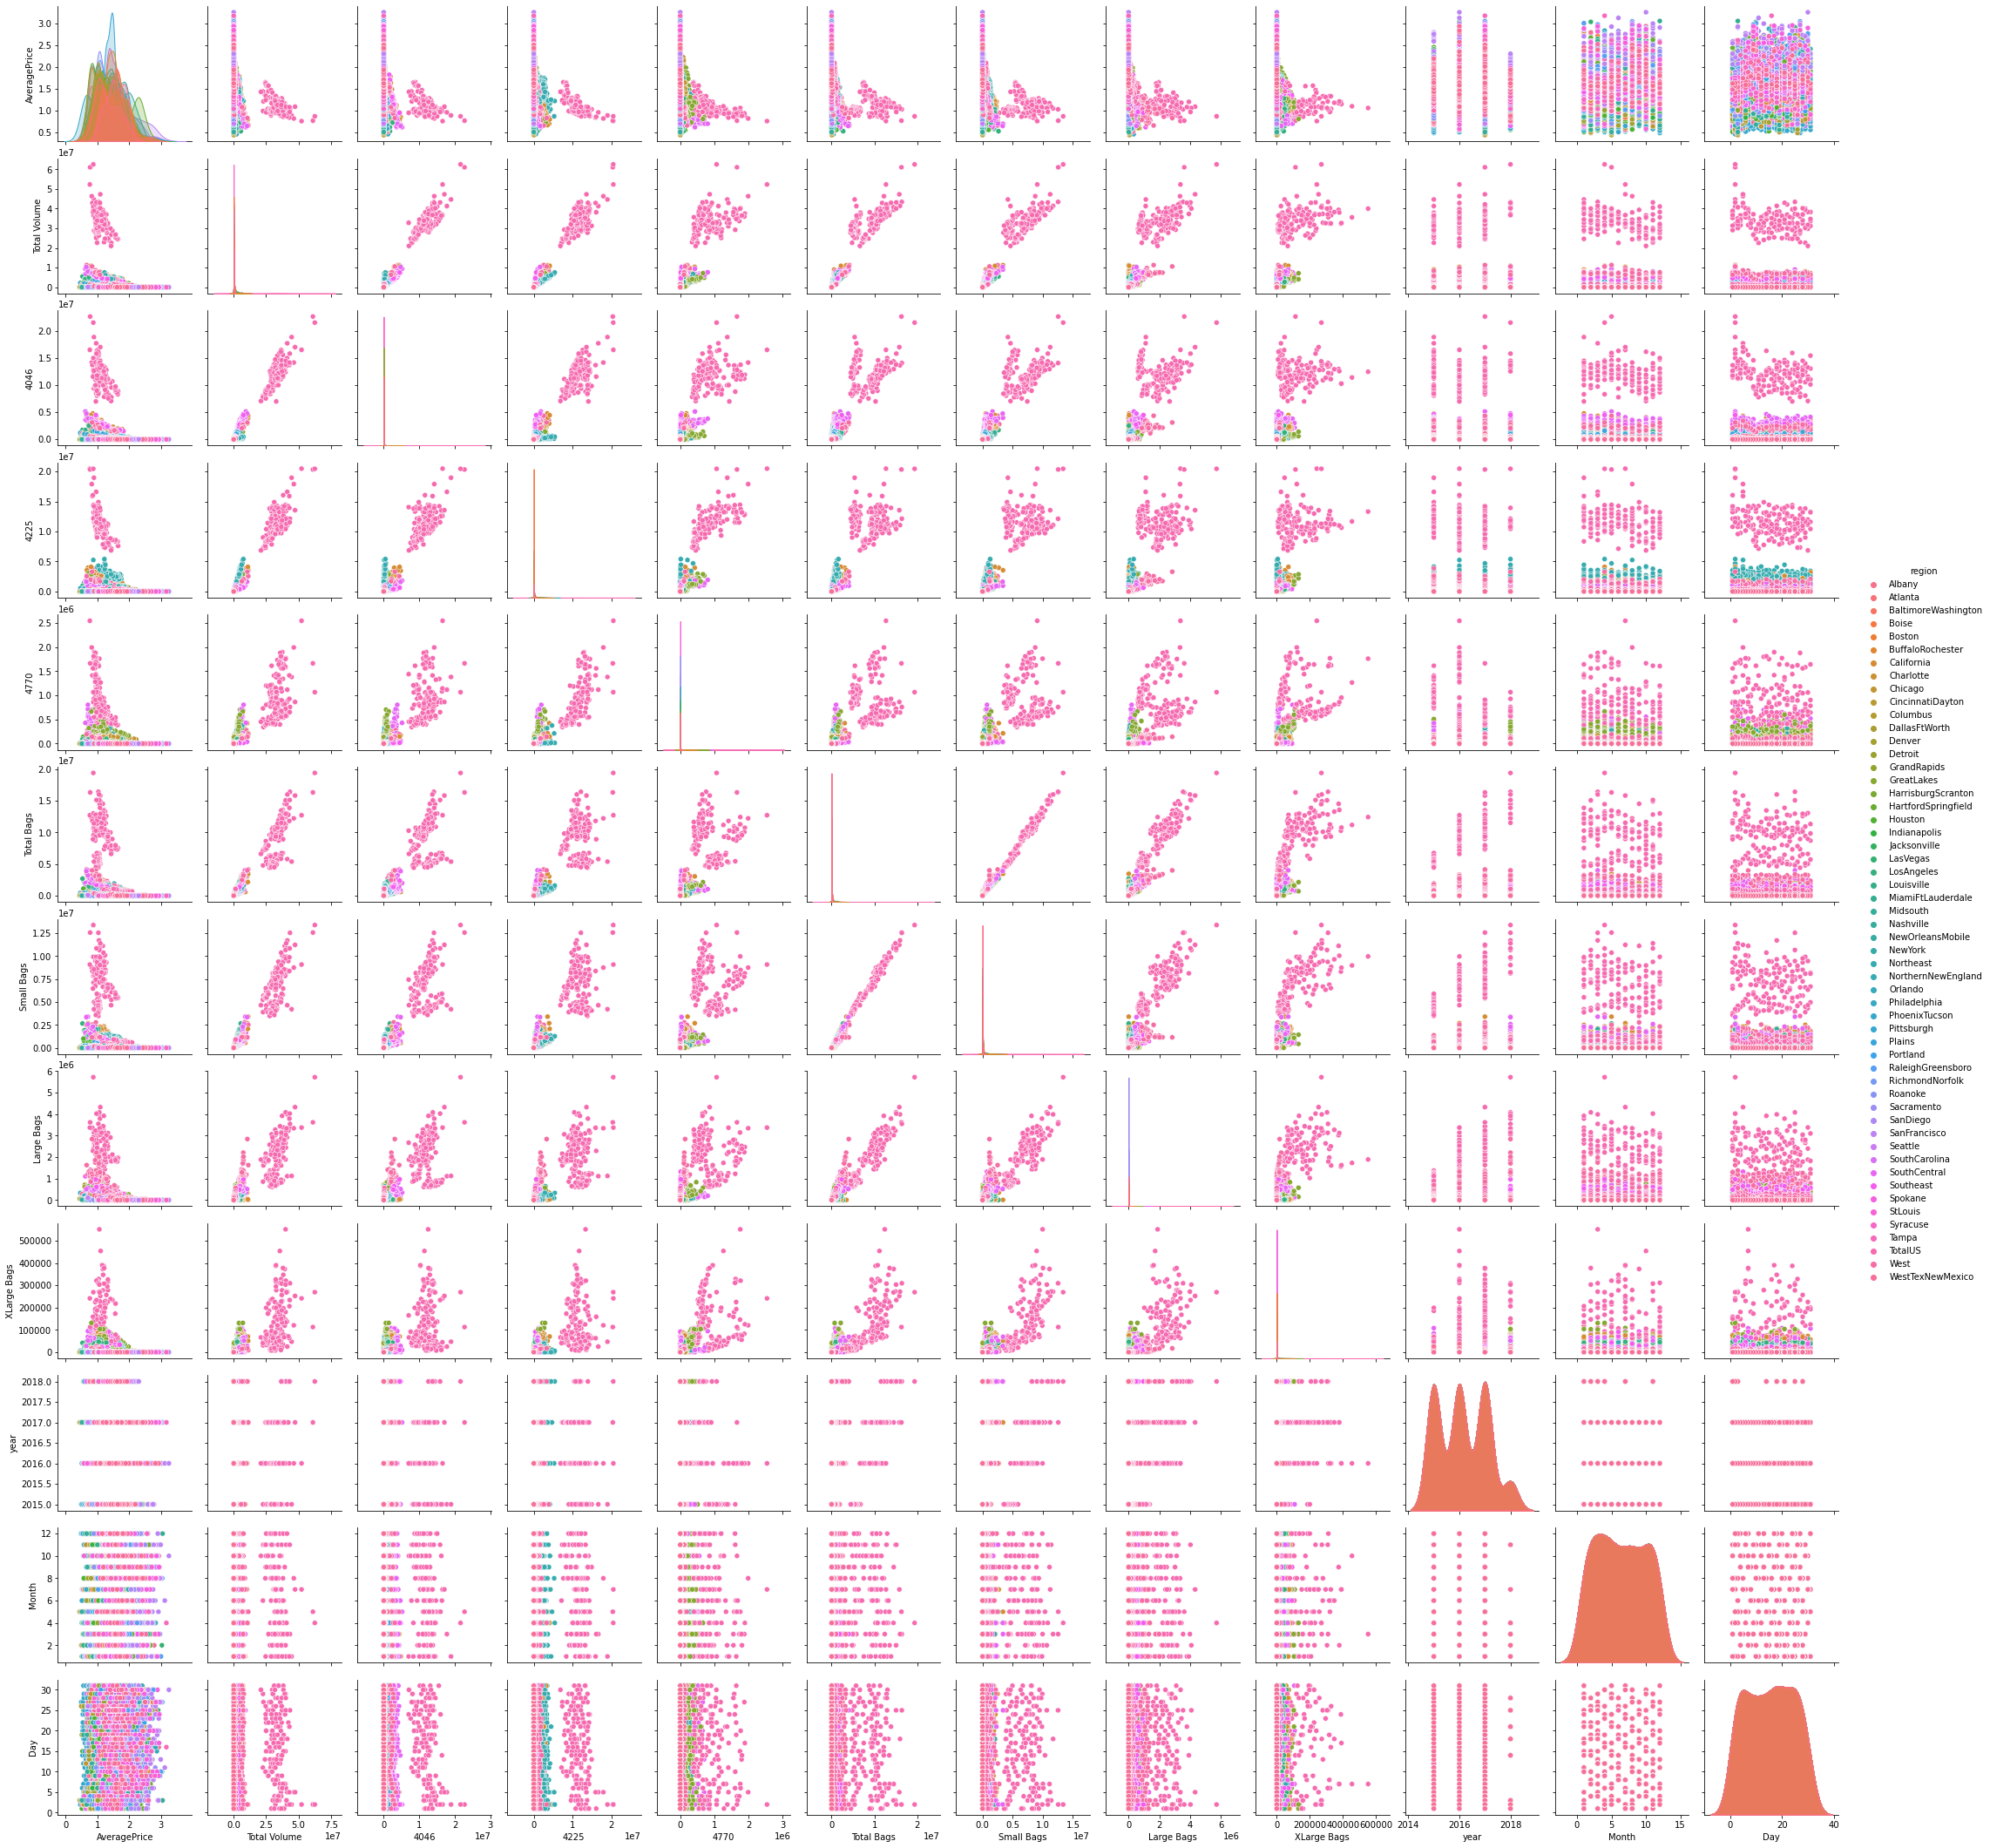

In [82]:
sns.pairplot(df,hue="region")

# Checking for outliers:

<AxesSubplot:>

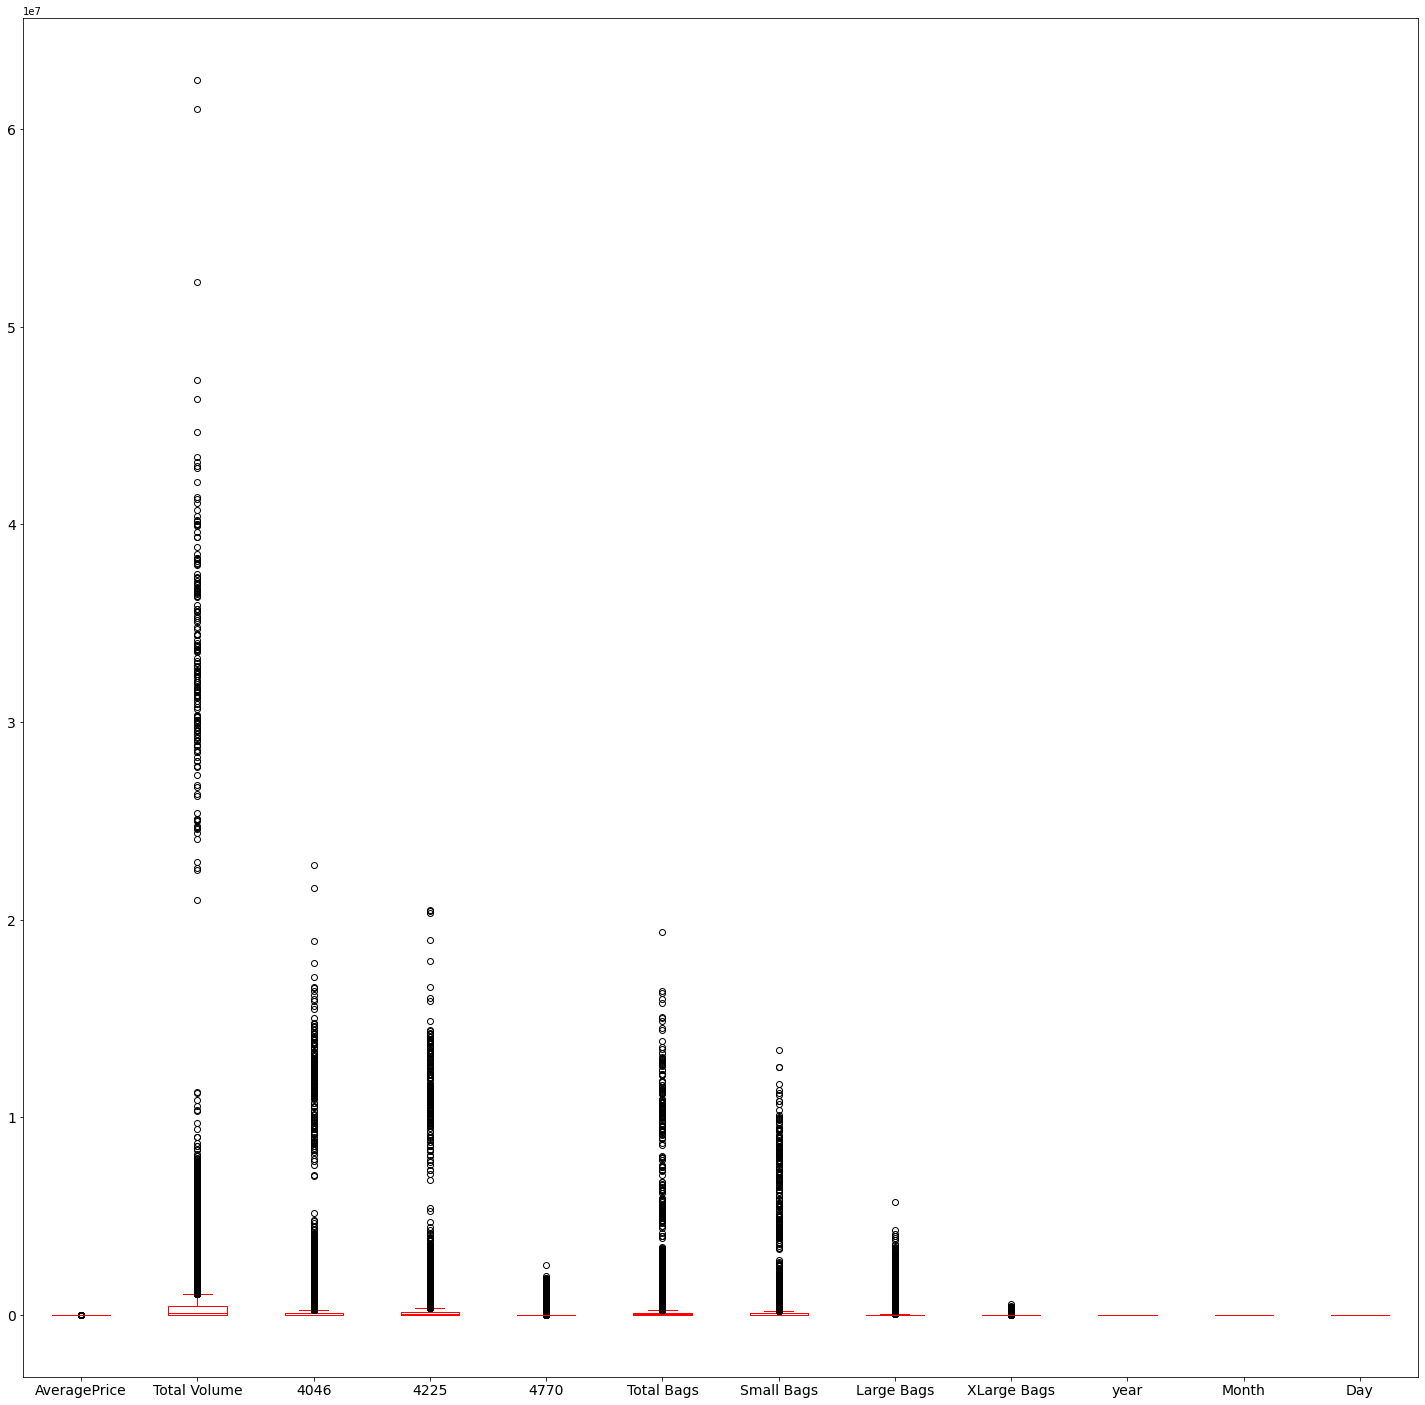

In [83]:
df.plot(kind='box',fontsize=14,figsize=(25,25),color='r')

# Removing Outliers

# i) Zscore method

In [84]:
# Features containing outliers
features = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [85]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

array([[0.22771641, 0.23081597, 0.1999022 , ..., 0.2326465 , 0.22235202,
        0.17557961],
       [0.23042664, 0.23110251, 0.20805446, ..., 0.23156838, 0.22233464,
        0.17557961],
       [0.21208462, 0.23100731, 0.1544779 , ..., 0.23339891, 0.22231148,
        0.17557961],
       ...,
       [0.24233073, 0.2306933 , 0.24309014, ..., 0.23164379, 0.22256082,
        0.17557961],
       [0.24162464, 0.2304279 , 0.24265143, ..., 0.22954271, 0.2225293 ,
        0.17557961],
       [0.24125273, 0.22934712, 0.24317042, ..., 0.22811058, 0.22262764,
        0.17557961]])

In [87]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [88]:
# Shape of original dataset
df.shape

(18249, 14)

In [89]:
# Shape of new dataframe
new_df.shape

(17782, 14)

In [92]:
# Checking the the data loss
data_loss = (18249-17782)/18249*100
data_loss


2.55904433119623

# Checking for skewness

In [93]:
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

In [97]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [102]:
"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.077498,-0.653478,0.347595,-0.211000,-0.534630,-0.345773,-0.790997,-0.690053
1,-0.149430,-0.772418,0.264847,-0.163530,-0.495872,-0.310029,-0.781674,-0.690053
2,0.203754,-0.727336,0.649765,0.035861,-0.563017,-0.372523,-0.769794,-0.690053
3,0.017373,-0.628807,0.466424,-0.109357,-0.707053,-0.507434,-0.713991,-0.690053
4,-0.182452,-0.680384,0.257393,-0.098665,-0.680813,-0.487242,-0.627024,-0.690053


In [103]:
new_df.skew()

AveragePrice    0.560969
Total Volume    0.028361
4046           -0.013639
4225            0.007333
4770            0.025396
Total Bags      0.023075
Small Bags      0.021549
Large Bags      0.028334
XLarge Bags     0.759178
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

In [106]:
# Removing skewness using log transformation
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])

In [107]:
# Let's check the skewness again
new_df.skew()

AveragePrice    0.560969
Total Volume    0.028361
4046           -0.013639
4225            0.007333
4770            0.025396
Total Bags      0.023075
Small Bags      0.021549
Large Bags      0.028334
XLarge Bags    -4.140451
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

# Encoding the categorical columns using Label Encoding

In [109]:
categorical_col = ["type","region"]

In [114]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [115]:
new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


# i) Correlation between the target variable(region) and independent variables using HEAT map

In [117]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576597,-0.549454,-0.449329,-0.491225,-0.563558,-0.493471,-0.478852,-0.026053,0.608447,0.099910,0.010428,0.071568,0.058266
Total Volume,-0.576597,1.000000,0.890126,0.925702,0.819139,0.941003,0.907344,0.689355,0.192196,-0.800435,0.075214,0.065996,-0.015386,-0.010522
4046,-0.549454,0.890126,1.000000,0.765536,0.736903,0.801861,0.781464,0.610803,0.135178,-0.726116,-0.002441,0.159486,-0.013968,-0.009212
4225,-0.449329,0.925702,0.765536,1.000000,0.797433,0.822178,0.789974,0.620183,0.168624,-0.747726,-0.005282,0.031962,-0.019147,-0.008128
4770,-0.491225,0.819139,0.736903,0.797433,1.000000,0.762069,0.754805,0.551712,0.180887,-0.781057,-0.051548,0.037950,-0.012125,-0.000709
Total Bags,-0.563558,0.941003,0.801861,0.822178,0.762069,1.000000,0.951252,0.738337,0.189641,-0.725049,0.209489,0.066795,-0.004472,-0.007540
Small Bags,-0.493471,0.907344,0.781464,0.789974,0.754805,0.951252,1.000000,0.576999,0.192252,-0.719899,0.184761,0.052912,-0.002631,-0.003472
Large Bags,-0.478852,0.689355,0.610803,0.620183,0.551712,0.738337,0.576999,1.000000,0.107701,-0.502019,0.189626,0.090115,-0.004719,-0.006166
XLarge Bags,-0.026053,0.192196,0.135178,0.168624,0.180887,0.189641,0.192252,0.107701,1.000000,-0.124423,0.053596,-0.024831,-0.002157,-0.020843
type,0.608447,-0.800435,-0.726116,-0.747726,-0.781057,-0.725049,-0.719899,-0.502019,-0.124423,1.000000,0.007399,0.021970,-0.003290,-0.003108


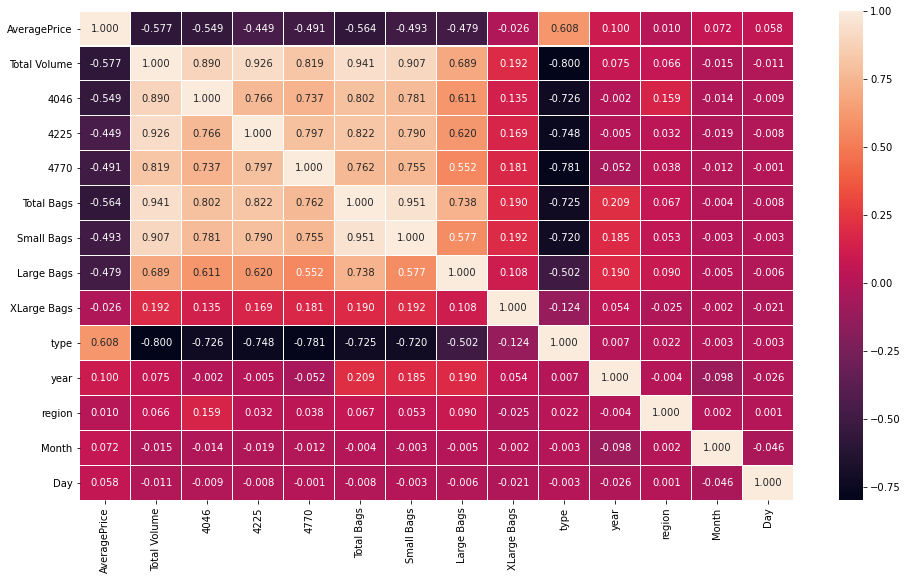

In [120]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0);

In [121]:
cor['region'].sort_values(ascending=False)

region          1.000000
4046            0.159486
Large Bags      0.090115
Total Bags      0.066795
Total Volume    0.065996
Small Bags      0.052912
4770            0.037950
4225            0.031962
type            0.021970
AveragePrice    0.010428
Month           0.001784
Day             0.000890
year           -0.003610
XLarge Bags    -0.024831
Name: region, dtype: float64

# Visualizing the correlation between label and features using bar plot

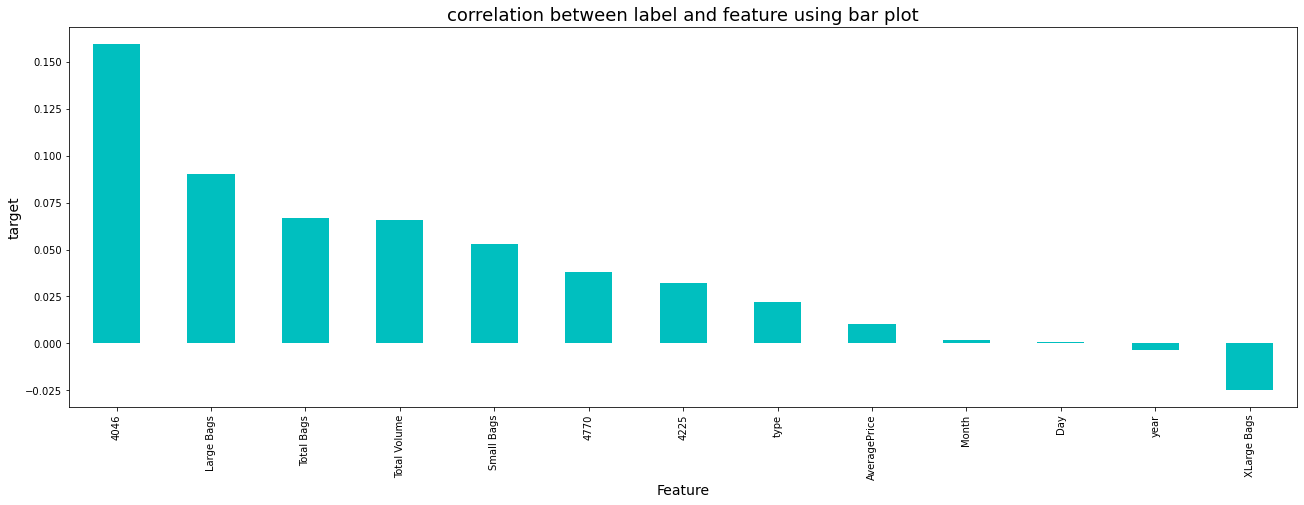

In [124]:
plt.figure(figsize=(22,7))
new_df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

In [125]:
new_df.drop("Month",axis=1, inplace=True)
new_df.drop("Day",axis=1, inplace=True)
new_df.drop("year",axis=1, inplace=True)

In [126]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,-0.077498,-0.653478,0.347595,-0.211000,-0.534630,-0.345773,-0.790997,NaN,0,0
1,1.35,-0.149430,-0.772418,0.264847,-0.163530,-0.495872,-0.310029,-0.781674,NaN,0,0
2,0.93,0.203754,-0.727336,0.649765,0.035861,-0.563017,-0.372523,-0.769794,NaN,0,0
3,1.08,0.017373,-0.628807,0.466424,-0.109357,-0.707053,-0.507434,-0.713991,NaN,0,0
4,1.28,-0.182452,-0.680384,0.257393,-0.098665,-0.680813,-0.487242,-0.627024,NaN,0,0


# Separating the features and label variables into x and y

In [128]:
x = new_df.drop("region", axis=1)
y = new_df["region"]

In [129]:
x.shape

(17782, 10)

In [130]:
y.shape

(17782,)

In [131]:
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,-0.077498,-0.653478,0.347595,-0.211000,-0.534630,-0.345773,-0.790997,NaN,0
1,1.35,-0.149430,-0.772418,0.264847,-0.163530,-0.495872,-0.310029,-0.781674,NaN,0
2,0.93,0.203754,-0.727336,0.649765,0.035861,-0.563017,-0.372523,-0.769794,NaN,0
3,1.08,0.017373,-0.628807,0.466424,-0.109357,-0.707053,-0.507434,-0.713991,NaN,0
4,1.28,-0.182452,-0.680384,0.257393,-0.098665,-0.680813,-0.487242,-0.627024,NaN,0


# Standard Scalarization

In [133]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,-0.212660,-0.077498,-0.653478,0.347595,-0.211000,-0.534630,-0.345773,-0.790997,NaN,-1.026443
1,-0.162942,-0.149430,-0.772418,0.264847,-0.163530,-0.495872,-0.310029,-0.781674,NaN,-1.026443
2,-1.207026,0.203754,-0.727336,0.649765,0.035861,-0.563017,-0.372523,-0.769794,NaN,-1.026443
3,-0.834139,0.017373,-0.628807,0.466424,-0.109357,-0.707053,-0.507434,-0.713991,NaN,-1.026443
4,-0.336956,-0.182452,-0.680384,0.257393,-0.098665,-0.680813,-0.487242,-0.627024,NaN,-1.026443
...,...,...,...,...,...,...,...,...,...,...
17777,0.533114,-0.675038,-0.459250,-0.923314,-1.225830,-0.340323,-0.175559,-0.441294,NaN,0.974238
17778,0.731987,-0.766771,-0.614325,-0.671998,-1.225830,-0.507081,-0.330478,-0.510891,NaN,0.974238
17779,1.129733,-0.770658,-0.614273,-0.778670,0.456608,-0.501029,-0.312439,-0.948950,NaN,0.974238
17780,1.278888,-0.698284,-0.543739,-0.717107,0.456298,-0.432860,-0.249656,-0.916786,NaN,0.974238


In [159]:
df=pd.read_csv('avacado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Bivariate Analysis

Text(0, 0.5, 'AveragePrice')

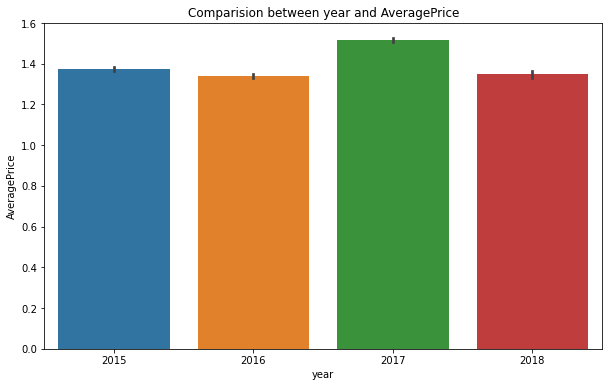

In [166]:
# Checking which year has maximum AveragePrice
plt.figure(figsize=[10,6])
plt.title('Comparision between year and AveragePrice')
sns.barplot(df['year'],df['AveragePrice'], data=df);
plt.xlabel("year")
plt.ylabel("AveragePrice")

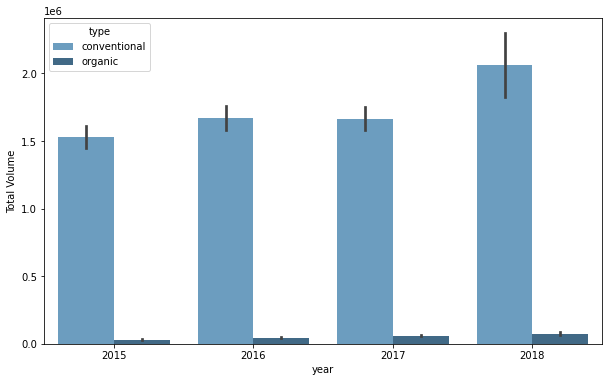

In [167]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='Total Volume',hue="type",data=df,palette="Blues_d",ci=68)
plt.show()

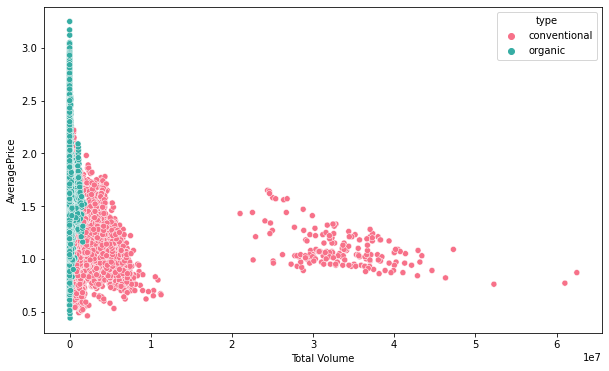

In [170]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=df,palette="husl")
plt.show()

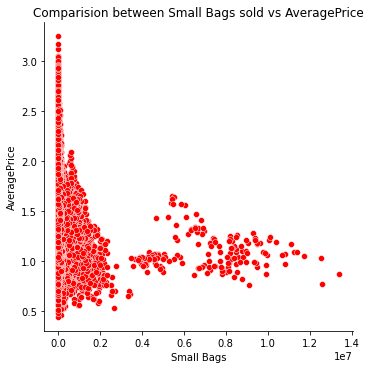

In [176]:
sns.relplot(df['Small Bags'],df['AveragePrice'],color="r");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

In [179]:
categorical_col = ["type","region"]

In [184]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [185]:
df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


# Correlation between the target variable and independent variables using HEAT map

In [187]:
cor=df.corr()
cor

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.000288,-0.171667,-0.000489
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
